<a href="https://colab.research.google.com/github/ancestor9/2025_Winter_Deep-Learning-with-TensorFlow/blob/main/Transformer_mechanism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **임베딩(Embedding vector) 차원의 의미?**
- 임베딩(Embedding)에서 **차원(Dimension)이란** 데이터를 설명하는 **특징(Feature)의 개수**
- 3차원 임베딩 공간 (특징: [남성성, 왕족권위, 나이])을 이해하라

<img src='https://dkharazi.github.io/ecc71bb7c9e227b292dd909b02dbf4e8/embedding.svg'>

In [32]:
import numpy as np

# 3차원 임베딩 공간 (특징: [남성성, 왕족권위, 나이])
king  = np.array([0.99, 0.95, 0.70])
queen = np.array([0.10, 0.95, 0.65])
man   = np.array([0.95, 0.05, 0.50])
woman = np.array([0.05, 0.02, 0.45])

# 단어 간의 유사도(거리) 계산
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

print(f"왕과 여왕의 유사도: {cosine_similarity(king, queen):.4f}")
print(f"왕과 남자의 유사도: {cosine_similarity(king, man):.4f}")
print(f"왕과 여자의 유사도: {cosine_similarity(king, woman):.4f}")

# 임베딩의 마법: 왕 - 남자 + 여자 = ?
result = king - man + woman
print(f"\n'왕 - 남자 + 여자'의 벡터 값: {result}")
print(f"이 결과와 '여왕' 벡터의 유사도: {cosine_similarity(result, queen):.4f}")

왕과 여왕의 유사도: 0.8184
왕과 남자의 유사도: 0.8083
왕과 여자의 유사도: 0.5494

'왕 - 남자 + 여자'의 벡터 값: [0.09 0.92 0.65]
이 결과와 '여왕' 벡터의 유사도: 0.9999


Shape: (50, 128)
First 20 position encoding:
[0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
First ~ 30 position encoding:
[ 0.91294525  0.40808206 -0.9991789   0.04051578  0.65189374 -0.75831033
  0.40891246  0.91257361 -0.96860186  0.24861705 -0.30941002 -0.95092873
  0.83649091 -0.5479808   0.85226355  0.52311265  0.04135821  0.99914438
 -0.72176294  0.69214034 -0.99953922  0.03035377 -0.82230928 -0.56904081
 -0.40315897 -0.91512996  0.06170039 -0.99809472  0.45693803 -0.88949853]


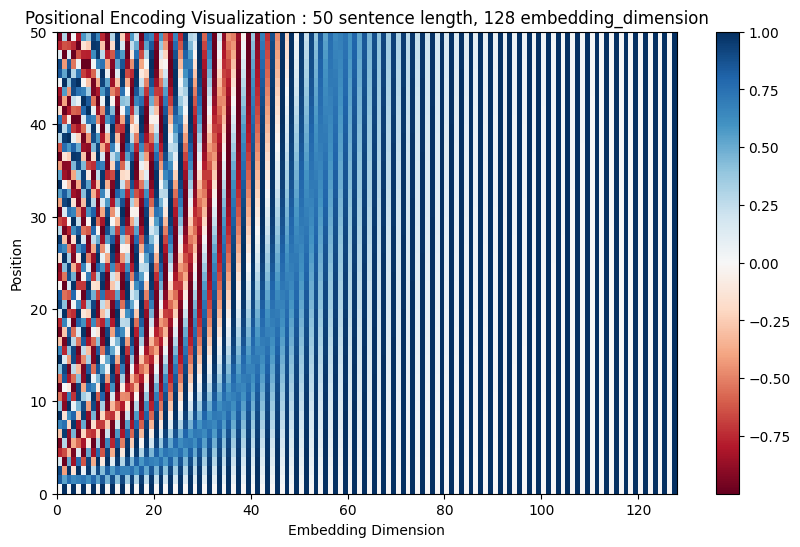

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def positional_encoding(seq_len, d_model):
    """
    Transformer의 Positional Encoding 구현

    Args:
        seq_len: 문장 길이 (위치의 개수)
        d_model: 임베딩 차원

    Returns:
        (seq_len, d_model) 크기의 positional encoding 행렬
    """
    # 위치 인덱스 생성 (0, 1, 2, ..., seq_len-1)
    pos = np.arange(seq_len)[:, np.newaxis]  # (seq_len, 1)

    # 차원 인덱스 생성 (0, 1, 2, ..., d_model-1)
    i = np.arange(d_model)[np.newaxis, :]  # (1, d_model)

    # 각도 계산
    angle = pos / np.power(10000, (2 * (i // 2)) / d_model)

    # 짝수 인덱스에는 sin, 홀수 인덱스에는 cos 적용
    pos_encoding = np.zeros((seq_len, d_model))
    pos_encoding[:, 0::2] = np.sin(angle[:, 0::2])  # 짝수
    pos_encoding[:, 1::2] = np.cos(angle[:, 1::2])  # 홀수

    return pos_encoding

# 예제: 문장 길이 50, 임베딩 차원 128
sentence_len = 50
embedding_d =128
pe = positional_encoding(sentence_len, embedding_d)
print(f"Shape: {pe.shape}")
print(f"First 20 position encoding:\n{pe[0, :20]}")  # 첫 위치의 처음 20개 차원
print(f"First ~ 30 position encoding:\n{pe[20, :30]}")  # 첫 위치의 처음 10개 차원

# 시각화
plt.figure(figsize=(10, 6))
plt.pcolormesh(pe, cmap='RdBu')
plt.xlabel('Embedding Dimension')
plt.ylabel('Position')
plt.colorbar()
plt.title(f'Positional Encoding Visualization : {sentence_len} sentence length, {embedding_d} embedding_dimension')
plt.show()

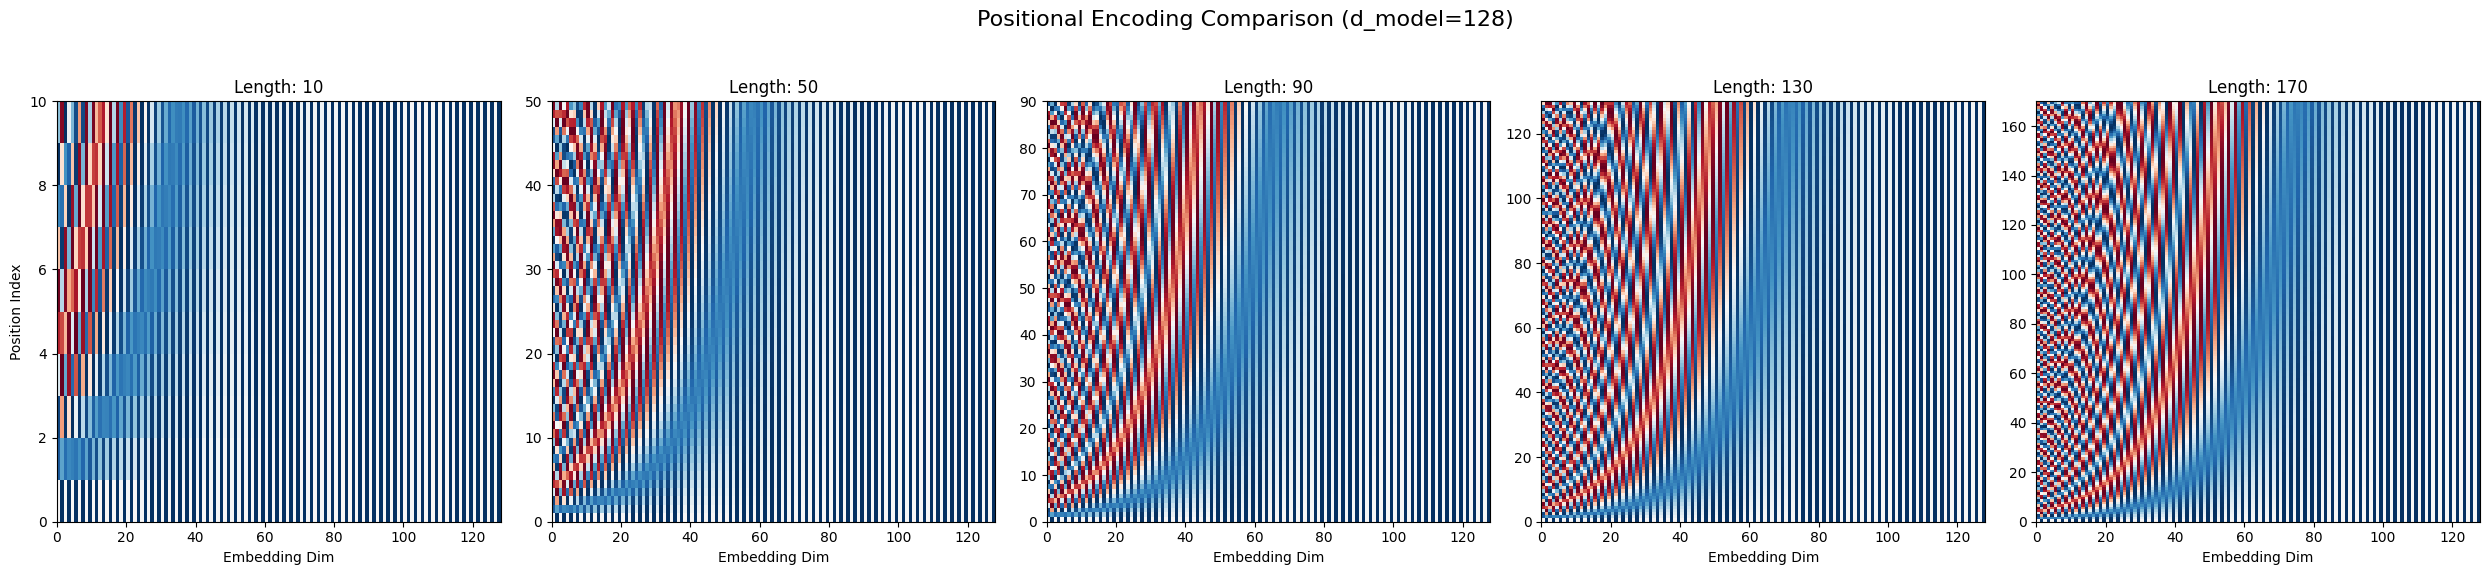

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def positional_encoding(seq_len, d_model):
    pos = np.arange(seq_len)[:, np.newaxis]
    i = np.arange(d_model)[np.newaxis, :]
    angle = pos / np.power(10000, (2 * (i // 2)) / d_model)

    pos_encoding = np.zeros((seq_len, d_model))
    pos_encoding[:, 0::2] = np.sin(angle[:, 0::2])
    pos_encoding[:, 1::2] = np.cos(angle[:, 1::2])
    return pos_encoding

# 변화시킬 문장 길이 리스트
seq_lengths = [10, 50, 90, 130, 170]
embedding_d = 128

# 1행 5열의 서브플롯 생성
fig, axes = plt.subplots(1, 5, figsize=(25, 6))

for idx, seq_len in enumerate(seq_lengths):
    pe = positional_encoding(seq_len, embedding_d)

    # pcolormesh를 이용한 시각화
    im = axes[idx].pcolormesh(pe, cmap='RdBu')
    axes[idx].set_title(f'Length: {seq_len}')
    axes[idx].set_xlabel('Embedding Dim')
    if idx == 0:
        axes[idx].set_ylabel('Position Index')

    # 각 플롯 옆에 컬러바 추가 (선택 사항)
    # plt.colorbar(im, ax=axes[idx])

plt.suptitle(f'Positional Encoding Comparison (d_model={embedding_d})', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 전체 제목 공간 확보
plt.show()

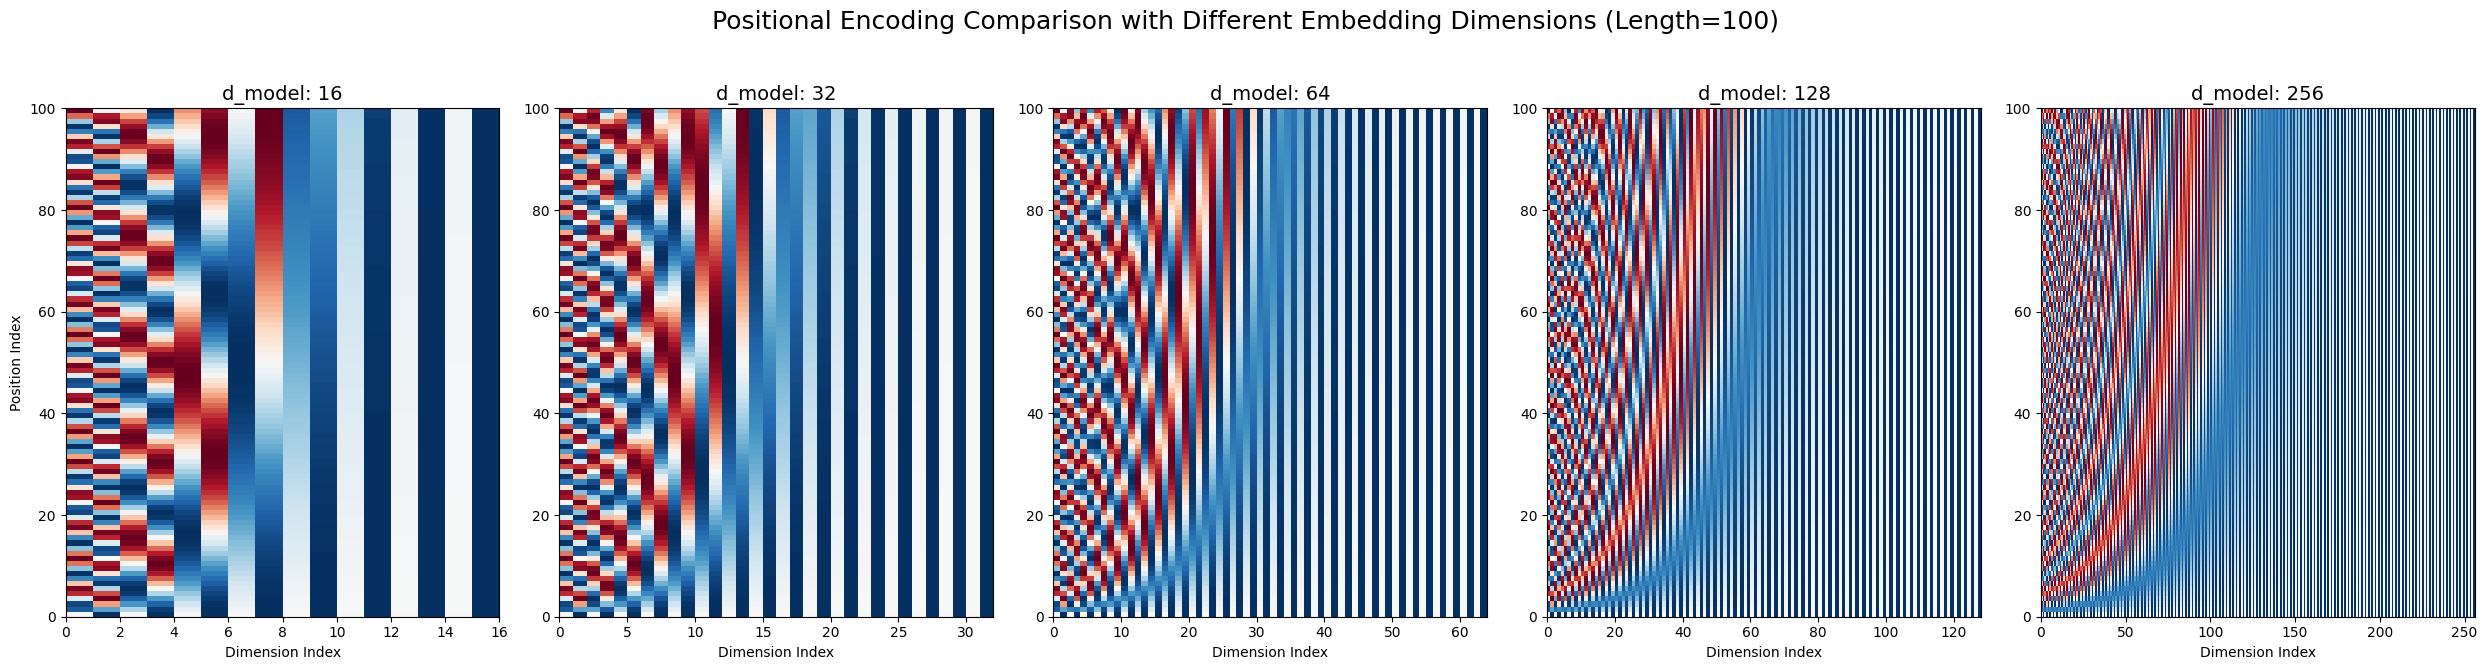

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def positional_encoding(seq_len, d_model):
    pos = np.arange(seq_len)[:, np.newaxis]
    i = np.arange(d_model)[np.newaxis, :]
    angle = pos / np.power(10000, (2 * (i // 2)) / d_model)

    pos_encoding = np.zeros((seq_len, d_model))
    pos_encoding[:, 0::2] = np.sin(angle[:, 0::2])
    pos_encoding[:, 1::2] = np.cos(angle[:, 1::2])
    return pos_encoding

# 변화시킬 임베딩 차원 리스트
d_models = [16, 32, 64, 128, 256]
fixed_seq_len = 100 # 패턴을 명확히 보기 위해 길이를 100으로 고정

# 1행 5열 서브플롯 생성
fig, axes = plt.subplots(1, 5, figsize=(25, 7))

for idx, d_model in enumerate(d_models):
    pe = positional_encoding(fixed_seq_len, d_model)

    # 히트맵 그리기
    im = axes[idx].pcolormesh(pe, cmap='RdBu')
    axes[idx].set_title(f'd_model: {d_model}', fontsize=14)
    axes[idx].set_xlabel('Dimension Index')
    if idx == 0:
        axes[idx].set_ylabel('Position Index')

    # 각 그래프의 가로축 범위를 차원 수에 맞게 조정
    axes[idx].set_xlim(0, d_model)

plt.suptitle(f'Positional Encoding Comparison with Different Embedding Dimensions (Length={fixed_seq_len})', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

실습 시나리오

문장 A: "I love you" (단어 "I"가 0번 인덱스)

문장 B: "You love I" (단어 "I"가 2번 인덱스)

목표: 같은 단어 "I"의 임베딩이 위치에 따라 어떻게 변하는지 확인합니다.

In [2]:
import numpy as np

# 1. 포지셔널 인코딩 함수 (가장 succinct한 버전)
def get_pe(length, d_model):
    pos = np.arange(length)[:, np.newaxis]
    i = np.arange(d_model)[np.newaxis, :]
    angles = pos / np.power(10000, (2 * (i // 2)) / d_model)
    angles[:, 0::2] = np.sin(angles[:, 0::2])
    angles[:, 1::2] = np.cos(angles[:, 1::2])
    return angles

# 2. 설정: 임베딩 차원은 4차원(보기 편하게), 문장 길이는 3
d_model = 4
pe_matrix = get_pe(3, d_model)

# 3. 가상의 단어 "I"의 임베딩 벡터 (위치 정보가 없는 상태)
i_embedding = np.array([0.5, 0.5, 0.5, 0.5])

# 4. 각 문장에서 "I"의 최종 입력값 계산
# 문장 A에서 "I"는 0번 위치
i_at_pos_0 = i_embedding + pe_matrix[0]

# 문장 B에서 "I"는 2번 위치
i_at_pos_2 = i_embedding + pe_matrix[2]

print("--- 동일한 단어 'I'의 변신 ---")
print(f"원래 'I' 벡터:      {i_embedding}")
print(f"0번 위치의 'I': {i_at_pos_0.round(2)}")
print(f"2번 위치의 'I': {i_at_pos_2.round(2)}")

--- 동일한 단어 'I'의 변신 ---
원래 'I' 벡터:      [0.5 0.5 0.5 0.5]
0번 위치의 'I': [0.5 1.5 0.5 1.5]
2번 위치의 'I': [1.41 0.08 0.52 1.5 ]


모델은 최종적으로 계산된 **[0.6, 0.3, 1.1]**과 **[0.3, 1.1, 0.7]**을 입력받습니다.

결과적으로 모델은 **"아, 똑같은 'I'라는 단어지만 문장 내에서의 위치가 다르구나!"**라고 명확하게 인지하게 됩니다. 이것이 트랜스포머가 RNN처럼 순차적으로 데이터를 처리하지 않고도 문장의 어순을 완벽하게 이해할 수 있는 비결입니다.

이 과정이 끝나면 이제 이 벡터들은 Self-Attention 층으로 들어가 단어들 사이의 관계를 파악하게 됩니다. 다음 단계인 **Self-Attention의 핵심 원리(Query, Key, Value)**에 대해서도 알아볼까요?

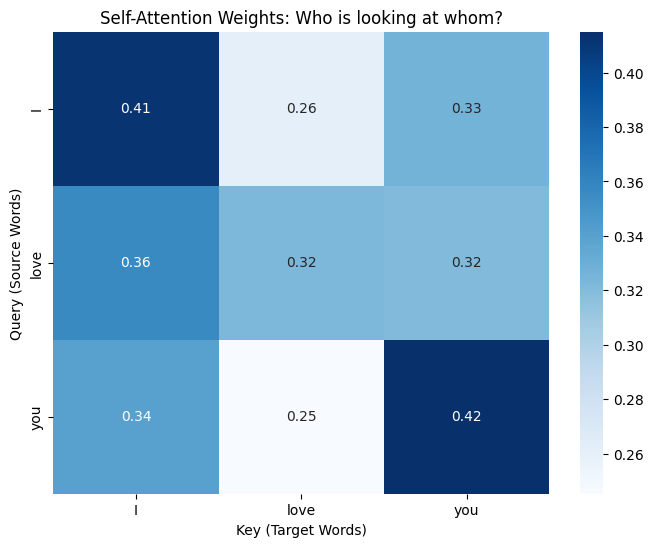

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def self_attention(Q, K, V):
    # 1. 스케일링을 위한 Key 벡터의 차원 수(d_k) 추출
    d_k = Q.shape[-1]

    # 2. 유사도 점수(Attention Score) 계산
    # Q와 K의 내적(Dot Product)을 통해 단어 간의 연관성을 구함
    # np.sqrt(d_k)로 나누는 이유는 차원이 커짐에 따라 내적값이 비대해져서
    # 소프트맥스 함수의 기울기가 소실되는 것을 방지하기 위함 (Scaling)
    scores = np.matmul(Q, K.T) / np.sqrt(d_k)

    # 3. 소프트맥스(Softmax) 적용
    # 점수들을 0~1 사이의 확률값으로 변환. 각 행(단어)의 합은 1이 됨
    # 이 확률값은 '어떤 단어에 얼마나 집중(Attention)할 것인가'를 결정하는 가중치가 됨
    weights = np.exp(scores) / np.sum(np.exp(scores), axis=-1, keepdims=True)

    # 4. 가중치와 Value(V)의 행렬 곱
    # 계산된 가중치를 실제 정보(V)에 곱하여 문맥 정보가 통합된 최종 벡터를 얻음
    # 중요한 단어의 정보는 많이 포함되고, 그렇지 않은 단어는 무시됨
    output = np.matmul(weights, V)

    return output, weights

# --- 시각화 부분 ---

# 1. 예제 문장 및 차원 설정
words = ["I", "love", "you"]
d_model = 16  # 임베딩 차원 (간결함을 위해 작은 숫자 사용)

# 2. 가상의 입력 데이터 생성
# 실제 트랜스포머에서는 (단어 임베딩 + 포지셔널 인코딩)이 완료된 상태의 벡터
np.random.seed(42)
X = np.random.rand(len(words), d_model)

# 3. 어텐션 연산 수행
# 셀프 어텐션이므로 Q, K, V가 모두 동일한 입력 X에서 시작됨
Q = K = V = X
output, weights = self_attention(Q, K, V)

# 4. 어텐션 가중치(Attention Weights) 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(weights,
            annot=True,      # 각 칸에 가중치 수치 표시
            fmt=".2f",       # 소수점 둘째자리까지 표시
            cmap="Blues",    # 연관성이 높을수록 진한 파란색
            xticklabels=words, # X축: 참조 대상이 되는 단어(Key)
            yticklabels=words) # Y축: 질문을 던지는 단어(Query)

plt.title("Self-Attention Weights: Who is looking at whom?")
plt.xlabel("Key (Target Words)")
plt.ylabel("Query (Source Words)")
plt.show()

이 시각화가 의미하는 것

- 가로/세로축 (Words): 문장 내의 단어들입니다. 세로(Query) 단어가 가로(Key) 단어를 얼마나 중요하게 생각하는지 나타냅니다.

- 숫자 (0~1): 어텐션 가중치입니다. 합쳐서 1이 되며, 숫자가 클수록(색이 진할수록) 두 단어의 연관성이 높다고 모델이 판단한 것(내적이 크면 연관성이 크다)입니다.

- 대각선 방향: 보통 자기 자신("I"가 "I"를 보는 경우)에 가장 높은 점수가 나오지만, 학습이 잘 된 모델은 "it"이 "animal"을 강하게 비추는 것처럼 문맥적 관계를 찾아냅니다.

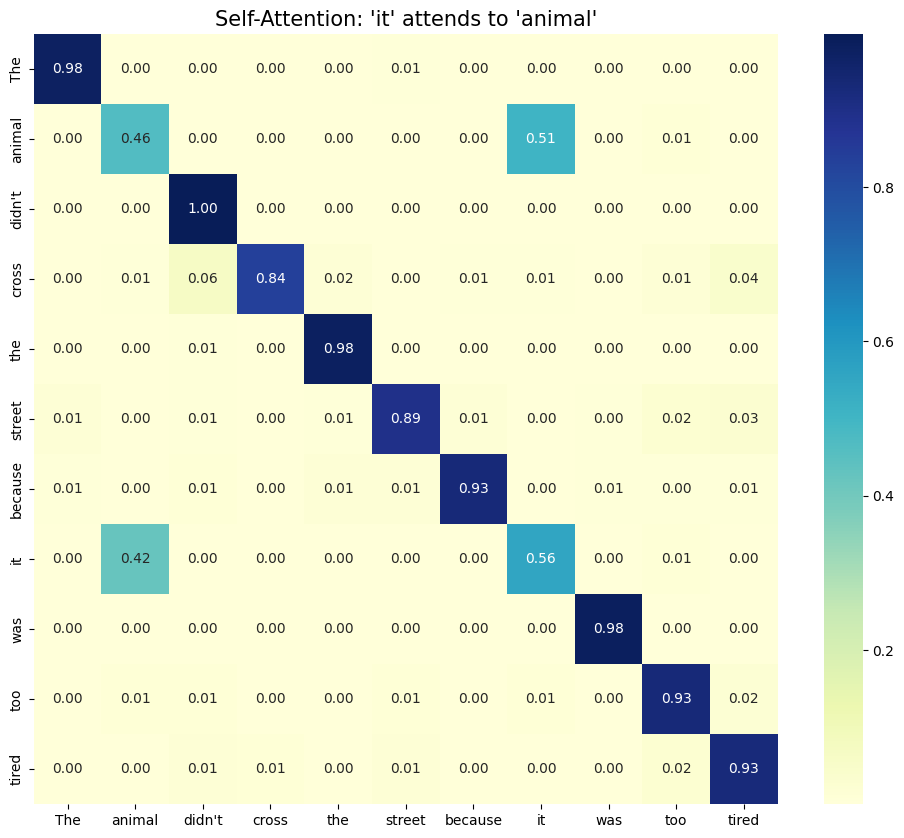

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_attention_v2(sentence, d_model):
    words = sentence.split()
    n = len(words)

    # 1. 가상의 입력 벡터 (실제 학습된 모델이 아니므로 랜덤값 사용)
    # 하지만 "it"과 "animal"의 관계를 보여주기 위해 "it" 인덱스의 특정 값을 "animal"과 유사하게 조작해봅니다.
    X = np.random.randn(n, d_model)
    it_idx = words.index("it")
    animal_idx = words.index("animal")
    # "it"이 "animal"을 더 잘 보게끔 Query와 Key의 유사도를 살짝 높여 시뮬레이션
    X[it_idx] = X[animal_idx] + np.random.randn(d_model) * 0.2

    # 2. Scaled Dot-Product Attention 계산
    Q = K = V = X
    scores = np.matmul(Q, K.T) / np.sqrt(d_model)

    # Softmax
    exp_scores = np.exp(scores - np.max(scores, axis=-1, keepdims=True)) # 수치 안정성을 위해 max 뺌
    weights = exp_scores / np.sum(exp_scores, axis=-1, keepdims=True)

    # 3. 히트맵 그리기
    plt.figure(figsize=(12, 10))
    sns.heatmap(weights, annot=True, fmt=".2f", cmap='YlGnBu',
                xticklabels=words, yticklabels=words)
    plt.title("Self-Attention: 'it' attends to 'animal'", fontsize=15)
    plt.show()

# 실행
sentence = "The animal didn't cross the street because it was too tired"
visualize_attention_v2(sentence, d_model=34)

이 시각화는 "한 번의 어텐션"만을 보여줍니다. 트랜스포머는 이런 어텐션을 여러 개 병렬로 수행하는 **멀티 헤드 어텐션(Multi-Head Attention)**을 사용합니다. 여러 개의 어텐션 결과가 어떻게 하나로 합쳐지는지 그 과정을 코드로 확인해 보시겠어요?

단어가 12차원 임베딩이라면,

| 단어   | Head 0 (차원 1–4)      | Head 1 (차원 5–8)      | Head 2 (차원 9–12)     |
| ---- | -------------------- | -------------------- | -------------------- |
| love | [0.1, 0.2, 0.3, 0.4] | [0.5, 0.6, 0.7, 0.8] | [0.9, 0.1, 0.2, 0.3] |

입력: 12개의 숫자가 들어옵니다.

분할: 앞의 4개, 중간 4개, 뒤의 4개로 쪼개서 각각의 '어텐션 헤드'에게 줍니다.

전문가 분석:

Head 0은 앞의 4개 숫자를 보고 "이 단어의 문법은 이렇군!"

Head 1은 중간 4개 숫자를 보고 "이 단어의 감정 상태는 이렇군!"

Head 2는 뒤의 4개 숫자를 보고 "이 단어와 어울리는 목적어는 이거군!"

합체: 각자 분석한 4차원 결과물들을 다시 옆으로 붙여서 다시 12차원으로 만듭니다.


In [5]:
import numpy as np

def scaled_dot_product_attention(Q, K, V):
    d_k = Q.shape[-1]
    scores = np.matmul(Q, K.T) / np.sqrt(d_k)
    weights = np.exp(scores) / np.sum(np.exp(scores), axis=-1, keepdims=True)
    return np.matmul(weights, V)

def multi_head_attention(X, num_heads, d_model):
    n_batch, n_seq, d_model = 1, X.shape[0], X.shape[1] # 편의상 배치 1로 가정
    d_k = d_model // num_heads # 각 헤드의 차원 (예: 512 / 8 = 64)

    # 1. 가상의 선형 변환 (실제론 학습되는 파라미터 W_q, W_k, W_v와 곱함)
    # 여기서는 이해를 돕기 위해 원본 X를 헤드 수만큼 쪼개기만 함
    heads = []

    print(f"입력 차원: {d_model} -> {num_heads}개의 헤드로 분할 (각 {d_k}차원)")

    # 2. 병렬 어텐션 수행 (각 헤드가 서로 다른 부분을 학습)
    for i in range(num_heads):
        # 헤드별로 차원을 슬라이싱 (실제 모델에선 Linear 층 통과 후 수행)
        Q_i = K_i = V_i = X[:, i*d_k : (i+1)*d_k]

        # 각 헤드에서 독립적인 어텐션 수행
        head_output = scaled_dot_product_attention(Q_i, K_i, V_i)
        heads.append(head_output)
        print(f" - Head {i} 어텐션 완료: {head_output.shape}")

    # 3. Concatenation: 모든 헤드의 결과물을 옆으로 이어 붙임
    combined = np.concatenate(heads, axis=-1)
    print(f"모든 헤드 결합(Concat) 후 차원: {combined.shape}")

    # 4. Final Linear: 최종 결과물을 하나로 섞어줌 (가상의 가중치 곱)
    W_o = np.random.rand(d_model, d_model)
    output = np.matmul(combined, W_o)

    return output

# 실행 예시: 3개 단어, 12차원 벡터, 3개의 헤드
words = ["I", "love", "you"]
X = np.random.rand(3, 12)
output = multi_head_attention(X, num_heads=3, d_model=12)

입력 차원: 12 -> 3개의 헤드로 분할 (각 4차원)
 - Head 0 어텐션 완료: (3, 4)
 - Head 1 어텐션 완료: (3, 4)
 - Head 2 어텐션 완료: (3, 4)
모든 헤드 결합(Concat) 후 차원: (3, 12)


멀티 헤드 어텐션의

- Split: 입력 벡터를 여러 개의 헤드로 쪼갭니다.

- Attention: 각 헤드가 독립적으로 셀프 어텐션을 수행합니다.

- Concat: 각 헤드의 결과물을 다시 하나로 이어 붙입니다.

- Linear: 최종 결과물을 원래 차원으로 변환합니다.

12차원이나 512차원이라는 숫자는 모델이 단어를 이해하기 위해 사용하는 **'안경의 렌즈 개수'**와 같습니다. 렌즈가 많을수록(차원이 높을수록) 사물을 더 입체적이고 정확하게 볼 수 있는 것이죠.

트랜스포머는 이 수많은 차원(특징)들을 멀티 헤드 어텐션을 통해 쪼개서 분석함으로써, 어떤 차원은 '문법'을 보고 어떤 차원은 '의미'를 보게끔 효율적으로 운영하는 것입니다.

이 개념을 바탕으로, 아까 궁금해하셨던 **피드 포워드 신경망(FFN)**이 이 차원들을 어떻게 다시 정제하고 가공하는지 설명해 드릴까요? FFN은 이 차원들 사이의 복잡한 관계를 한 번 더 비틀어주는 역할을 합니다.

임베딩 벡터의 **차원(Dimension)**, 쉽게 말해 **하나의 단어를 설명하기 위해 사용되는 특징(Feature)'의 가짓 수**를 의미합니다.

차원이 무엇을 의미하는지 가장 직관적인 비유를 통해 설명해 드릴게요.

1. 차원의 직관적 비유: '단어 프로필 보고서'
만약 우리가 '사과'라는 단어를 컴퓨터에게 설명해야 한다고 가정해 봅시다.

1차원 (저해상도): [당도]라는 정보만 있다면?

사과: [0.9], 레몬: [0.1]. (구분은 되지만 정보가 너무 부족함)

3차원 (중해상도): [당도, 색깔, 크기] 정보가 있다면?

사과: [0.9, 0.8, 0.5]

딸기: [0.7, 0.9, 0.1] (이제 색깔과 크기로 사과와 딸기를 구분할 수 있음)

512차원 (고해상도 - 실제 트랜스포머): [당도, 색깔, 크기, 품종, 원산지, 문법적 역할, 과거형인지, 긍정적인지...] 등 512개의 아주 미세한 특징으로 단어를 묘사합니다.

2. 수학적 의미: '고차원 공간상의 좌표'
임베딩 벡터의 각 차원은 공간의 축이 됩니다.

2차원이면 평면 위의 한 점 (x, y)로 단어가 나타납니다.

512차원이면 우리가 상상할 수 없는 아주 복잡한 512차원 공간 속의 한 점이 됩니다.

이 공간의 핵심은 **"비슷한 의미를 가진 단어들은 가까이 모인다"**는 것입니다.

'왕'과 '왕비'는 성별 차원에서는 멀지만, '권력'이나 '궁궐' 차원에서는 매우 가깝게 위치하게 됩니다.